 # 🐍 Python Web - Module 6: Complete Tutorial

 ## Реляційні бази даних та Асинхронне програмування



 **Версія**: 2.0.0

 **Рівні**: Basic + Advanced

 **Тривалість**: 5-7 годин



 ---



 ## 📋 Зміст



 ### Частина 1: Базові Модулі (3-4 години)

 1. **Асинхронне Програмування**

    - Event Loop та async/await

    - Паралельні HTTP запити з aiohttp

    - Порівняння sync vs async



 2. **SQL Основи**

    - SELECT, JOIN, GROUP BY

    - Window Functions

    - Subqueries та CTEs



 3. **Python + PostgreSQL**

    - Підключення через psycopg2

    - CRUD операції

    - Транзакції та безпека



 4. **Аналіз Даних**

    - pandas + PostgreSQL

    - RFM сегментація

    - Візуалізація



 ### Частина 2: Advanced Модулі (2-3 години)

 5. **Production ETL Pipeline**

    - Async extraction з множинних джерел

    - Data validation та type safety

    - Metrics collection



 6. **Architectural Patterns**

    - Repository Pattern

    - Dependency Injection

    - Factory Pattern



 7. **ML Feature Store**

    - Feature engineering

    - Offline/Online stores

    - ML infrastructure



 8. **Advanced SQL Analytics**

    - Cohort analysis

    - Funnel analysis

    - Time-series analysis



 ---

 ## ⚙️ Початкова Конфігурація



 Перед початком переконайтеся що:

 - ✅ Docker Desktop запущено

 - ✅ PostgreSQL контейнер працює

 - ✅ Встановлено всі Python залежності

In [49]:
# Імпорти для всього notebook
import sys
import os
import asyncio
import time
from datetime import datetime, timedelta
from typing import List, Dict, Any, Optional
import warnings

# Додаємо поточну директорію до шляху Python
sys.path.insert(0, os.path.abspath('.'))

# Вимикаємо непотрібні попередження
warnings.filterwarnings('ignore')

print("✅ Імпорти завершено успішно")


✅ Імпорти завершено успішно


 ### Перевірка Docker та PostgreSQL

In [50]:
import subprocess

def check_docker():
    """Перевірка чи запущено Docker"""
    try:
        result = subprocess.run(['docker', 'ps'],
                              capture_output=True,
                              text=True,
                              timeout=5)
        if result.returncode == 0:
            print("✅ Docker запущено")

            # Перевірка PostgreSQL контейнера
            if 'postgres' in result.stdout:
                print("✅ PostgreSQL контейнер працює")
                return True
            else:
                print("⚠️ PostgreSQL контейнер не знайдено")
                print("💡 Запустіть: docker-compose up -d")
                return False
        else:
            print("❌ Docker не запущено")
            return False
    except Exception as e:
        print(f"❌ Помилка перевірки Docker: {e}")
        return False

docker_ok = check_docker()


✅ Docker запущено
✅ PostgreSQL контейнер працює


 ### Перевірка Підключення до PostgreSQL

In [51]:
import psycopg2
from psycopg2.extras import RealDictCursor

def test_db_connection():
    """Тест підключення до бази даних"""
    try:
        conn = psycopg2.connect(
            host="localhost",
            port=5432,
            database="learning_db",
            user="admin",
            password="admin123"
        )

        cursor = conn.cursor()
        cursor.execute("SELECT version();")
        version = cursor.fetchone()[0]

        cursor.execute("SELECT COUNT(*) FROM customers;")
        customer_count = cursor.fetchone()[0]

        cursor.close()
        conn.close()

        print("✅ Підключення до PostgreSQL успішне")
        print(f"📊 PostgreSQL версія: {version[:50]}...")
        print(f"👥 Клієнтів в БД: {customer_count}")
        return True

    except Exception as e:
        print(f"❌ Помилка підключення: {e}")
        print("💡 Переконайтесь що PostgreSQL запущено: docker-compose up -d")
        return False

if docker_ok:
    db_ok = test_db_connection()
else:
    print("⚠️ Пропускаємо перевірку БД (Docker не запущено)")
    db_ok = False


✅ Підключення до PostgreSQL успішне
📊 PostgreSQL версія: PostgreSQL 15.14 on x86_64-pc-linux-musl, compiled...
👥 Клієнтів в БД: 10


 ---

 # Частина 1: Базові Модулі

 ---

 ## 1️⃣ Асинхронне Програмування



 ### 🎯 Навчальні цілі:

 - Зрозуміти як працює Event Loop

 - Навчитися використовувати async/await

 - Побачити різницю в продуктивності sync vs async

 - Писати паралельні HTTP запити з aiohttp

 ### 1.1 Event Loop та async/await - Основи



 **Event Loop** - це серце асинхронного програмування в Python. Він:

 - Керує виконанням асинхронних задач

 - Переключається між задачами коли вони очікують (I/O операції)

 - Дозволяє паралелізм без створення потоків

In [52]:
# Простий приклад: sync vs async

def sync_task(name: str, duration: int):
    """Синхронна задача - блокує виконання"""
    print(f"🔵 Sync Task {name} почалась")
    time.sleep(duration)
    print(f"✅ Sync Task {name} завершилась ({duration}s)")
    return f"Result {name}"

async def async_task(name: str, duration: int):
    """Асинхронна задача - не блокує виконання"""
    print(f"🟢 Async Task {name} почалась")
    await asyncio.sleep(duration)
    print(f"✅ Async Task {name} завершилась ({duration}s)")
    return f"Result {name}"

# Sync виконання
print("=" * 60)
print("СИНХРОННЕ ВИКОНАННЯ (послідовне)")
print("=" * 60)
start = time.time()
sync_task("A", 1)
sync_task("B", 1)
sync_task("C", 1)
sync_total = time.time() - start
print(f"\n⏱️ Загальний час: {sync_total:.2f}s\n")

# Async виконання
print("=" * 60)
print("АСИНХРОННЕ ВИКОНАННЯ (паралельне)")
print("=" * 60)
start = time.time()
await asyncio.gather(
    async_task("A", 1),
    async_task("B", 1),
    async_task("C", 1)
)
async_total = time.time() - start
print(f"\n⏱️ Загальний час: {async_total:.2f}s")

# Порівняння
print("\n" + "=" * 60)
print("ПОРІВНЯННЯ ПРОДУКТИВНОСТІ")
print("=" * 60)
print(f"Sync:  {sync_total:.2f}s")
print(f"Async: {async_total:.2f}s")
print(f"🚀 Прискорення: {sync_total/async_total:.1f}x")


СИНХРОННЕ ВИКОНАННЯ (послідовне)
🔵 Sync Task A почалась


✅ Sync Task A завершилась (1s)
🔵 Sync Task B почалась
✅ Sync Task B завершилась (1s)
🔵 Sync Task C почалась
✅ Sync Task C завершилась (1s)

⏱️ Загальний час: 3.00s

АСИНХРОННЕ ВИКОНАННЯ (паралельне)
🟢 Async Task A почалась
🟢 Async Task B почалась
🟢 Async Task C почалась
✅ Async Task A завершилась (1s)
✅ Async Task B завершилась (1s)
✅ Async Task C завершилась (1s)

⏱️ Загальний час: 1.00s

ПОРІВНЯННЯ ПРОДУКТИВНОСТІ
Sync:  3.00s
Async: 1.00s
🚀 Прискорення: 3.0x


 ### 1.2 Паралельні HTTP Запити



 Асинхронність найбільш корисна для I/O операцій, таких як HTTP запити.

 Давайте імпортуємо приклади з нашого модуля.

In [53]:
# Імпортуємо функції з async_examples/02_async_http_client.py
import aiohttp
import requests

async def fetch_url_async(session: aiohttp.ClientSession, url: str) -> tuple:
    """Асинхронне завантаження URL"""
    try:
        start = time.time()
        async with session.get(url, timeout=aiohttp.ClientTimeout(total=10)) as response:
            content = await response.text()
            elapsed = time.time() - start
            return url, len(content), elapsed, None
    except Exception as e:
        return url, 0, 0, str(e)

def fetch_url_sync(url: str) -> tuple:
    """Синхронне завантаження URL"""
    try:
        start = time.time()
        response = requests.get(url, timeout=10)
        content = response.text
        elapsed = time.time() - start
        return url, len(content), elapsed, None
    except Exception as e:
        return url, 0, 0, str(e)

# Тестові URLs
urls = [
    "https://httpbin.org/delay/1",
    "https://httpbin.org/delay/1",
    "https://httpbin.org/delay/1",
]

print("=" * 80)
print("ТЕСТ: Паралельні HTTP Запити")
print("=" * 80)

# Sync підхід
print("\n1️⃣ СИНХРОННИЙ ПІДХІД (requests)")
print("-" * 80)
start = time.time()
sync_results = [fetch_url_sync(url) for url in urls]
sync_time = time.time() - start

for url, size, elapsed, error in sync_results:
    if error:
        print(f"❌ {url}: {error}")
    else:
        print(f"✅ {url}: {size:,} bytes in {elapsed:.2f}s")
print(f"\n⏱️ Загальний час (sync): {sync_time:.2f}s")

# Async підхід
print("\n2️⃣ АСИНХРОННИЙ ПІДХІД (aiohttp)")
print("-" * 80)
start = time.time()
async with aiohttp.ClientSession() as session:
    tasks = [fetch_url_async(session, url) for url in urls]
    async_results = await asyncio.gather(*tasks)
async_time = time.time() - start

for url, size, elapsed, error in async_results:
    if error:
        print(f"❌ {url}: {error}")
    else:
        print(f"✅ {url}: {size:,} bytes in {elapsed:.2f}s")
print(f"\n⏱️ Загальний час (async): {async_time:.2f}s")

# Порівняння
print("\n" + "=" * 80)
print("РЕЗУЛЬТАТ")
print("=" * 80)
print(f"Sync:  {sync_time:.2f}s")
print(f"Async: {async_time:.2f}s")
print(f"🚀 Прискорення: {sync_time/async_time:.1f}x")


ТЕСТ: Паралельні HTTP Запити

1️⃣ СИНХРОННИЙ ПІДХІД (requests)
--------------------------------------------------------------------------------
❌ https://httpbin.org/delay/1: HTTPSConnectionPool(host='httpbin.org', port=443): Read timed out. (read timeout=10)
❌ https://httpbin.org/delay/1: HTTPSConnectionPool(host='httpbin.org', port=443): Read timed out. (read timeout=10)
✅ https://httpbin.org/delay/1: 363 bytes in 3.34s

⏱️ Загальний час (sync): 24.06s

2️⃣ АСИНХРОННИЙ ПІДХІД (aiohttp)
--------------------------------------------------------------------------------
✅ https://httpbin.org/delay/1: 367 bytes in 5.06s
✅ https://httpbin.org/delay/1: 367 bytes in 2.17s
✅ https://httpbin.org/delay/1: 367 bytes in 6.12s

⏱️ Загальний час (async): 6.12s

РЕЗУЛЬТАТ
Sync:  24.06s
Async: 6.12s
🚀 Прискорення: 3.9x


 ### 📊 Висновки з Async Programming



 **Що ми навчилися:**

 - ✅ Event Loop дозволяє виконувати задачі паралельно

 - ✅ `async/await` - синтаксис для асинхронних функцій

 - ✅ `asyncio.gather()` - виконує декілька задач паралельно

 - ✅ aiohttp - async альтернатива requests

 - ✅ Прискорення 3-10x для I/O операцій



 **Коли використовувати async:**

 - ✅ HTTP запити до APIs

 - ✅ Робота з базами даних

 - ✅ Файлові операції

 - ✅ WebSockets



 **Коли НЕ використовувати:**

 - ❌ CPU-intensive задачі (використовуйте multiprocessing)

 - ❌ Прості скрипти з 1-2 запитами

 ---

 ## 2️⃣ SQL Основи та PostgreSQL



 ### 🎯 Навчальні цілі:

 - Виконувати базові SQL запити (SELECT, WHERE, ORDER BY)

 - Об'єднувати таблиці через JOIN

 - Агрегувати дані (GROUP BY, HAVING)

 - Використовувати Window Functions

 - Писати складні запити з SUBQUERY

 ### 2.1 Структура Бази Даних



 Наша навчальна БД містить 7 таблиць з реальними даними e-commerce:

 - **customers** - клієнти (100+ записів)

 - **products** - товари (50+ позицій)

 - **categories** - категорії товарів

 - **orders** - замовлення

 - **order_items** - позиції в замовленнях

 - **departments** - відділи компанії

 - **employees** - працівники

In [54]:
# Підключення до БД та огляд структури
if db_ok:
    conn = psycopg2.connect(
        host="localhost",
        database="learning_db",
        user="admin",
        password="admin123"
    )
    cursor = conn.cursor()

    print("=" * 80)
    print("СТРУКТУРА БАЗИ ДАНИХ")
    print("=" * 80)

    # Отримуємо список таблиць
    cursor.execute("""
        SELECT table_name
        FROM information_schema.tables
        WHERE table_schema = 'public'
        AND table_type = 'BASE TABLE'
        ORDER BY table_name;
    """)

    tables = cursor.fetchall()

    for (table_name,) in tables:
        # Кількість записів
        cursor.execute(f"SELECT COUNT(*) FROM {table_name};")
        count = cursor.fetchone()[0]

        # Колонки
        cursor.execute(f"""
            SELECT column_name, data_type
            FROM information_schema.columns
            WHERE table_name = '{table_name}'
            ORDER BY ordinal_position
            LIMIT 5;
        """)
        columns = cursor.fetchall()

        print(f"\n📋 {table_name.upper()}")
        print(f"   Записів: {count:,}")
        print(f"   Колонки: {', '.join([col[0] for col in columns])}")

    cursor.close()
    conn.close()
else:
    print("⚠️ База даних недоступна, пропускаємо огляд структури")


СТРУКТУРА БАЗИ ДАНИХ

📋 CATEGORIES
   Записів: 7
   Колонки: id, name, description, parent_category_id, created_at

📋 CUSTOMERS
   Записів: 10
   Колонки: id, first_name, last_name, email, phone

📋 DEPARTMENTS
   Записів: 6
   Колонки: id, name, location, created_at

📋 EMPLOYEES
   Записів: 12
   Колонки: id, first_name, last_name, email, phone

📋 ORDER_ITEMS
   Записів: 22
   Колонки: id, order_id, product_id, quantity, price_at_purchase

📋 ORDERS
   Записів: 10
   Колонки: id, customer_id, employee_id, order_date, status

📋 PRODUCTS
   Записів: 19
   Колонки: id, name, description, category_id, price

📋 WEATHER_DATA
   Записів: 5
   Колонки: id, city, temperature, humidity, description


 ### 2.2 Базові SQL Запити



 Розглянемо основні типи запитів.

In [55]:
if db_ok:
    conn = psycopg2.connect(
        host="localhost",
        database="learning_db",
        user="admin",
        password="admin123"
    )
    cursor = conn.cursor(cursor_factory=RealDictCursor)

    print("=" * 80)
    print("ПРИКЛАД 1: SELECT з WHERE та ORDER BY")
    print("=" * 80)
    print("Запит: Топ-5 клієнтів з найбільшими витратами\n")

    query = """
    SELECT
        c.id AS customer_id,
        c.first_name || ' ' || c.last_name AS full_name,
        c.email,
        SUM(oi.quantity * oi.price_at_purchase) AS total_spent
    FROM customers c
    JOIN orders o       ON o.customer_id = c.id
    JOIN order_items oi ON oi.order_id   = o.id
    GROUP BY c.id, c.first_name, c.last_name, c.email
    ORDER BY total_spent DESC
    LIMIT 5;

    """

    cursor.execute(query)
    results = cursor.fetchall()

    for row in results:
        print(f"👤 {row['full_name']:25} | 💰 {row['total_spent']:10.2f} грн | 📧 {row['email']}")

    cursor.close()
    conn.close()


ПРИКЛАД 1: SELECT з WHERE та ORDER BY
Запит: Топ-5 клієнтів з найбільшими витратами

👤 Petro Ivanov              | 💰   74095.00 грн | 📧 petro.ivanov@gmail.com
👤 Vasyl Shevchuk            | 💰   58998.00 грн | 📧 vasyl.shevchuk@gmail.com
👤 Anna Sidorenko            | 💰   47997.00 грн | 📧 anna.sidorenko@gmail.com
👤 Iryna Bondar              | 💰   38798.00 грн | 📧 iryna.bondar@gmail.com
👤 Kateryna Polishchuk       | 💰   33998.00 грн | 📧 kateryna.polishchuk@gmail.com


 ### 2.3 JOIN - Об'єднання Таблиць



 JOIN дозволяє комбінувати дані з кількох таблиць.

In [56]:
if db_ok:
    conn = psycopg2.connect(
        host="localhost",
        database="learning_db",
        user="admin",
        password="admin123"
    )
    cursor = conn.cursor(cursor_factory=RealDictCursor)

    print("=" * 80)
    print("ПРИКЛАД 2: INNER JOIN - Продажі по категоріях")
    print("=" * 80)

    query = """
    SELECT
        cat.id AS category_id,
        cat.name AS category_name,
        COUNT(DISTINCT o.id)            AS orders_count,
        SUM(oi.quantity)                AS total_items_sold,
        SUM(oi.quantity * oi.price_at_purchase) AS revenue
    FROM categories AS cat
    INNER JOIN products     AS p  ON p.category_id = cat.id
    INNER JOIN order_items  AS oi ON oi.product_id = p.id
    INNER JOIN orders       AS o  ON o.id = oi.order_id
    GROUP BY cat.id, cat.name
    ORDER BY revenue DESC;

    """

    cursor.execute(query)
    results = cursor.fetchall()

    print(f"\n{'Категорія':20} | {'Замовлень':>10} | {'Товарів':>10} | {'Дохід':>15}")
    print("-" * 80)
    for row in results:
        print(f"{row['category_name']:20} | {row['orders_count']:10} | {row['total_items_sold']:10} | {row['revenue']:15.2f} грн")

    cursor.close()
    conn.close()


ПРИКЛАД 2: INNER JOIN - Продажі по категоріях

Категорія            |  Замовлень |    Товарів |           Дохід
--------------------------------------------------------------------------------
Smartphones          |          4 |          7 |       114993.00 грн
Computers            |          3 |          6 |       113894.00 грн
Electronics          |          2 |          2 |        37998.00 грн
Kitchen              |          2 |          4 |        28996.00 грн
Clothing             |          2 |          5 |        11695.00 грн
Home & Garden        |          1 |          2 |        10998.00 грн
Books                |          1 |          2 |          798.00 грн


 ### 2.4 Window Functions - Аналітичні Функції



 Window Functions дозволяють робити обчислення "по вікнах" даних без GROUP BY.

In [57]:
if db_ok:
    conn = psycopg2.connect(
        host="localhost",
        database="learning_db",
        user="admin",
        password="admin123"
    )
    cursor = conn.cursor(cursor_factory=RealDictCursor)

    print("=" * 80)
    print("ПРИКЛАД 3: Window Functions - Ранжування клієнтів")
    print("=" * 80)

    query = """
    WITH customer_stats AS (
        SELECT
            c.id AS customer_id,
            c.first_name || ' ' || c.last_name AS full_name,
            COUNT(DISTINCT o.id) AS total_orders,
            COALESCE(SUM(oi.quantity * oi.price_at_purchase), 0) AS total_spent
        FROM customers c
        LEFT JOIN orders o       ON o.customer_id = c.id
        LEFT JOIN order_items oi ON oi.order_id   = o.id
        GROUP BY c.id, c.first_name, c.last_name
    )
    SELECT
        full_name,
        total_orders,
        total_spent,
        ROW_NUMBER() OVER (ORDER BY total_spent DESC) AS rank,
        NTILE(4)    OVER (ORDER BY total_spent DESC) AS quartile
    FROM customer_stats
    ORDER BY total_spent DESC
    LIMIT 10;
    """

    cursor.execute(query)
    results = cursor.fetchall()

    print(f"\n{'Клієнт':25} | {'Замовлень':>10} | {'Витрачено':>12} | {'Ранг':>5} | {'Квартиль':>10}")
    print("-" * 90)
    for row in results:
        print(f"{row['full_name']:25} | {row['total_orders']:10} | {row['total_spent']:12.2f} | {row['rank']:5} | {row['quartile']:10}")

    cursor.close()
    conn.close()


ПРИКЛАД 3: Window Functions - Ранжування клієнтів

Клієнт                    |  Замовлень |    Витрачено |  Ранг |   Квартиль
------------------------------------------------------------------------------------------
Petro Ivanov              |          2 |     74095.00 |     1 |          1
Vasyl Shevchuk            |          1 |     58998.00 |     2 |          1
Anna Sidorenko            |          1 |     47997.00 |     3 |          1
Iryna Bondar              |          1 |     38798.00 |     4 |          2
Kateryna Polishchuk       |          1 |     33998.00 |     5 |          2
Taras Melnychuk           |          1 |     18997.00 |     6 |          2
Bohdan Kravets            |          1 |     16695.00 |     7 |          3
Olha Rudenko              |          1 |     16498.00 |     8 |          3
Maksym Kovalchuk          |          1 |     13296.00 |     9 |          4
Halyna Tkach              |          0 |         0.00 |    10 |          4


 ### 📊 Висновки з SQL Основ



 **Що ми навчилися:**

 - ✅ SELECT для вибірки даних

 - ✅ WHERE для фільтрації

 - ✅ JOIN для об'єднання таблиць

 - ✅ GROUP BY для агрегації

 - ✅ Window Functions для аналітики



 **Типи JOIN:**

 - INNER JOIN - тільки співпадіння

 - LEFT JOIN - всі записи з лівої таблиці

 - RIGHT JOIN - всі записи з правої таблиці

 - FULL OUTER JOIN - всі записи з обох таблиць



 **Window Functions:**

 - ROW_NUMBER() - порядковий номер

 - RANK() - ранжування з пропусками

 - NTILE(n) - розподіл по групах

 - LAG/LEAD - доступ до попередніх/наступних рядків

 ---

 ## 3️⃣ Python + PostgreSQL



 ### 🎯 Навчальні цілі:

 - Підключатися до PostgreSQL через psycopg2

 - Виконувати CRUD операції

 - Використовувати parameterized queries для захисту від SQL Injection

 - Працювати з транзакціями

 - Використовувати context managers

 ### 3.1 Підключення та Базові Операції

In [58]:
if db_ok:
    from contextlib import contextmanager
    from datetime import datetime
    import psycopg2
    from psycopg2.extras import RealDictCursor

    @contextmanager
    def get_db_connection():
        """Context manager для безпечної роботи з БД"""
        conn = None
        try:
            conn = psycopg2.connect(
                host="localhost",
                database="learning_db",
                user="admin",
                password="admin123"
            )
            yield conn
            conn.commit()
        except Exception as e:
            if conn:
                conn.rollback()
            raise e
        finally:
            if conn:
                conn.close()

    print("=" * 80)
    print("CRUD ОПЕРАЦІЇ З PYTHON")
    print("=" * 80)

    # CREATE - Додавання нового клієнта
    print("\n1️⃣ CREATE - Додавання клієнта")
    print("-" * 80)

    with get_db_connection() as conn:
        cursor = conn.cursor()

        query = """
        INSERT INTO customers (first_name, last_name, email, phone, city, country, registration_date)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
        RETURNING id;
        """

        new_customer = (
            "Тест",
            "Тестович",
            f"test_{datetime.now().timestamp()}@example.com",
            "+380991234567",
            "Kyiv",          # <— додано city
            "Ukraine",
            datetime.now().date()
        )

        cursor.execute(query, new_customer)
        customer_id = cursor.fetchone()[0]

        print(f"✅ Створено клієнта з ID: {customer_id}")
        cursor.close()

    # READ - Читання даних
    print("\n2️⃣ READ - Читання клієнта")
    print("-" * 80)

    with get_db_connection() as conn:
        cursor = conn.cursor(cursor_factory=RealDictCursor)

        query = "SELECT * FROM customers WHERE id = %s;"
        cursor.execute(query, (customer_id,))

        customer = cursor.fetchone()
        print(f"👤 {customer['first_name']} {customer['last_name']}")
        print(f"   Email: {customer['email']}")
        print(f"   Phone: {customer['phone']}")

        cursor.close()

    # UPDATE - Оновлення даних
    print("\n3️⃣ UPDATE - Оновлення email")
    print("-" * 80)

    with get_db_connection() as conn:
        cursor = conn.cursor()

        new_email = f"updated_{datetime.now().timestamp()}@example.com"
        query = "UPDATE customers SET email = %s WHERE id = %s;"

        cursor.execute(query, (new_email, customer_id))
        print(f"✅ Email оновлено на: {new_email}")

        cursor.close()

    # DELETE - Видалення даних
    print("\n4️⃣ DELETE - Видалення клієнта")
    print("-" * 80)

    with get_db_connection() as conn:
        cursor = conn.cursor()

        query = "DELETE FROM customers WHERE id = %s;"
        cursor.execute(query, (customer_id,))

        print(f"✅ Клієнт з ID {customer_id} видалено")
        cursor.close()


CRUD ОПЕРАЦІЇ З PYTHON

1️⃣ CREATE - Додавання клієнта
--------------------------------------------------------------------------------
✅ Створено клієнта з ID: 14

2️⃣ READ - Читання клієнта
--------------------------------------------------------------------------------
👤 Тест Тестович
   Email: test_1761473732.543306@example.com
   Phone: +380991234567

3️⃣ UPDATE - Оновлення email
--------------------------------------------------------------------------------
✅ Email оновлено на: updated_1761473732.565441@example.com

4️⃣ DELETE - Видалення клієнта
--------------------------------------------------------------------------------
✅ Клієнт з ID 14 видалено


 ### 3.2 Захист від SQL Injection



 **НІКОЛИ не використовуйте string formatting для SQL запитів!**

In [59]:
print("=" * 80)
print("SQL INJECTION - Небезпечні vs Безпечні практики")
print("=" * 80)

# ❌ НЕБЕЗПЕЧНО - вразливо до SQL Injection
print("\n❌ НЕБЕЗПЕЧНО (НЕ РОБІТЬ ТАК!):")
print("-" * 80)
user_input = "test@example.com"
dangerous_query = f"SELECT * FROM customers WHERE email = '{user_input}';"
print(f"Query: {dangerous_query}")
print("⚠️ Якщо user_input = \"' OR '1'='1\", отримаємо всі записи!")

# ✅ БЕЗПЕЧНО - parameterized query
print("\n✅ БЕЗПЕЧНО (Використовуйте завжди!):")
print("-" * 80)
safe_query = "SELECT * FROM customers WHERE email = %s;"
print(f"Query: {safe_query}")
print(f"Params: ('{user_input}',)")
print("✅ psycopg2 автоматично екранує спеціальні символи")


SQL INJECTION - Небезпечні vs Безпечні практики

❌ НЕБЕЗПЕЧНО (НЕ РОБІТЬ ТАК!):
--------------------------------------------------------------------------------
Query: SELECT * FROM customers WHERE email = 'test@example.com';
⚠️ Якщо user_input = "' OR '1'='1", отримаємо всі записи!

✅ БЕЗПЕЧНО (Використовуйте завжди!):
--------------------------------------------------------------------------------
Query: SELECT * FROM customers WHERE email = %s;
Params: ('test@example.com',)
✅ psycopg2 автоматично екранує спеціальні символи


 ### 3.3 Транзакції



 Транзакції дозволяють виконувати кілька операцій атомарно (все або нічого).

In [60]:
if db_ok:
    print("=" * 80)
    print("ПРИКЛАД ТРАНЗАКЦІЇ - Переказ між рахунками")
    print("=" * 80)

    try:
        with get_db_connection() as conn:
            cursor = conn.cursor()

            # Симуляція переказу грошей
            sender_id = 1
            receiver_id = 2
            amount = 100.0

            print(f"\n💸 Переказ {amount} грн від клієнта {sender_id} до {receiver_id}")
            print("-" * 80)

            # Якщо тут виникне помилка, всі зміни будуть скасовані
            print("1. Списання з відправника...")
            print("2. Зарахування отримувачу...")
            print("3. Створення запису про транзакцію...")

            # Якщо все ОК, зміни будуть збережені (commit викликається автоматично)
            print("\n✅ Транзакція успішна - всі зміни збережено")

            cursor.close()

    except Exception as e:
        print(f"\n❌ Транзакція скасована - rollback виконано")
        print(f"   Помилка: {e}")


ПРИКЛАД ТРАНЗАКЦІЇ - Переказ між рахунками

💸 Переказ 100.0 грн від клієнта 1 до 2
--------------------------------------------------------------------------------
1. Списання з відправника...
2. Зарахування отримувачу...
3. Створення запису про транзакцію...

✅ Транзакція успішна - всі зміни збережено


 ### 📊 Висновки з Python + PostgreSQL



 **Що ми навчилися:**

 - ✅ psycopg2 для підключення до PostgreSQL

 - ✅ CRUD операції (Create, Read, Update, Delete)

 - ✅ Parameterized queries для безпеки

 - ✅ Context managers для автоматичного commit/rollback

 - ✅ Транзакції для атомарних операцій



 **Best Practices:**

 - ✅ Завжди використовуйте parameterized queries

 - ✅ Використовуйте context managers

 - ✅ Обробляйте винятки

 - ✅ Закривайте з'єднання

 - ✅ Використовуйте connection pooling для production

 ---

 ## 4️⃣ Аналіз Даних з pandas



 ### 🎯 Навчальні цілі:

 - Інтегрувати pandas з PostgreSQL

 - Виконувати RFM аналіз

 - Візуалізувати результати

 - Створювати звіти

 ### 4.1 pandas + PostgreSQL Інтеграція

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Налаштування стилю графіків
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

if db_ok:
    print("=" * 80)
    print("PANDAS + POSTGRESQL")
    print("=" * 80)

    conn = psycopg2.connect(
        host="localhost",
        database="learning_db",
        user="admin",
        password="admin123"
    )

    # Завантаження даних в DataFrame
    query = """
    SELECT
        c.id AS customer_id,
        c.first_name || ' ' || c.last_name AS customer_name,
        c.country,
        COUNT(DISTINCT o.id) AS total_orders,
        SUM(oi.quantity * oi.price_at_purchase) AS total_spent,
        MAX(o.order_date) AS last_order_date
    FROM customers c
    LEFT JOIN orders o       ON o.customer_id = c.id
    LEFT JOIN order_items oi ON oi.order_id   = o.id
    GROUP BY c.id, c.first_name, c.last_name, c.country
    HAVING COUNT(DISTINCT o.id) > 0;

    """

    df = pd.read_sql_query(query, conn)
    conn.close()

    print(f"\n📊 Завантажено {len(df)} клієнтів")
    print("\nПерші 5 записів:")
    display(df.head())

    print("\n📈 Базова статистика:")
    display(df[['total_orders', 'total_spent']].describe())


PANDAS + POSTGRESQL

📊 Завантажено 9 клієнтів

Перші 5 записів:


,customer_id,customer_name,country,total_orders,total_spent,last_order_date
0,1,Petro Ivanov,Ukraine,2,74095.0,2024-10-07 11:30:00
1,2,Anna Sidorenko,Ukraine,1,47997.0,2024-10-02 14:20:00
2,3,Maksym Kovalchuk,Ukraine,1,13296.0,2024-10-03 09:15:00
3,4,Iryna Bondar,Ukraine,1,38798.0,2024-10-05 16:45:00
4,5,Bohdan Kravets,Ukraine,1,16695.0,2024-10-08 13:00:00



📈 Базова статистика:


,total_orders,total_spent
count,9.000000,9.000000
mean,1.111111,35485.777778
std,0.333333,21479.951931
min,1.000000,13296.000000
25%,1.000000,16695.000000
50%,1.000000,33998.000000
75%,1.000000,47997.000000
max,2.000000,74095.000000


In [62]:
df

,customer_id,customer_name,country,total_orders,total_spent,last_order_date
0,1,Petro Ivanov,Ukraine,2,74095.0,2024-10-07 11:30:00
1,2,Anna Sidorenko,Ukraine,1,47997.0,2024-10-02 14:20:00
2,3,Maksym Kovalchuk,Ukraine,1,13296.0,2024-10-03 09:15:00
3,4,Iryna Bondar,Ukraine,1,38798.0,2024-10-05 16:45:00
4,5,Bohdan Kravets,Ukraine,1,16695.0,2024-10-08 13:00:00
5,6,Olha Rudenko,Ukraine,1,16498.0,2024-10-10 10:00:00
6,7,Taras Melnychuk,Ukraine,1,18997.0,2024-10-12 15:30:00
7,8,Kateryna Polishchuk,Ukraine,1,33998.0,2024-10-14 12:45:00
8,9,Vasyl Shevchuk,Ukraine,1,58998.0,2024-10-15 09:20:00


 ### 4.2 RFM Аналіз



 **RFM (Recency, Frequency, Monetary)** - метод сегментації клієнтів:

 - **Recency** - як давно був останній заказ

 - **Frequency** - як часто робить закази

 - **Monetary** - скільки витрачає грошей

In [63]:
import numpy as np

def quantile_score(s: pd.Series, n: int = 5, ascending: bool = True) -> pd.Series:
    """
    Дає оцінку 1..n за квантилями. Працює стабільно навіть коли багато однакових значень.
    - ascending=True: більше значення → вищий бал (для F та M)
    - ascending=False: менше значення → вищий бал (для R: менша давність = краще)
    """
    s = s.copy()
    mask = s.notna()
    k = int(min(n, mask.sum()))  # скільки реально можна зробити бінів

    if k == 0:
        return pd.Series(np.nan, index=s.index)

    # Робимо унікальні ранги, щоб не було дублів на межах
    ranks = s[mask].rank(method="first", ascending=ascending)

    # Поділяємо ранги на k квантилів і даємо мітки 1..k
    bins = pd.qcut(ranks, q=k, labels=list(range(1, k + 1)))

    out = pd.Series(np.nan, index=s.index, dtype="float")
    out.loc[mask] = bins.astype(int)
    return out

if db_ok and 'df' in locals():
    print("=" * 80)
    print("RFM СЕГМЕНТАЦІЯ КЛІЄНТІВ")
    print("=" * 80)

    # Обчислення RFM метрик
    today = pd.Timestamp.now()
    df['last_order_date'] = pd.to_datetime(df['last_order_date'])
    df['recency_days'] = (today - df['last_order_date']).dt.days

    # Надійні RFM-оцінки (1..5)
    df['R_score'] = quantile_score(df['recency_days'], n=5, ascending=False)  # менше днів = краще
    df['F_score'] = quantile_score(df['total_orders'], n=5, ascending=True)   # більше замовлень = краще
    df['M_score'] = quantile_score(df['total_spent'], n=5, ascending=True)    # більше витрат = краще

    # Загальний RFM score (як рядок, напр. "543")
    df['RFM_score'] = (
        df['R_score'].astype('Int64').astype(str) +
        df['F_score'].astype('Int64').astype(str) +
        df['M_score'].astype('Int64').astype(str)
    )

    # Сегментація (захист від NaN)
    def segment_customer(row):
        if pd.isna(row['R_score']) or pd.isna(row['F_score']) or pd.isna(row['M_score']):
            return 'Unknown'
        r, f, m = int(row['R_score']), int(row['F_score']), int(row['M_score'])
        if r >= 4 and f >= 4 and m >= 4:
            return 'VIP'
        elif r >= 4 and f >= 3:
            return 'Loyal'
        elif r >= 4:
            return 'Promising'
        elif f >= 4:
            return 'At Risk'
        else:
            return 'Lost'

    df['segment'] = df.apply(segment_customer, axis=1)

    # Результати
    print("\n📊 Розподіл клієнтів по сегментах:")
    print(df['segment'].value_counts(dropna=False))

    print("\n👥 Приклади клієнтів по сегментах:")
    for segment, grp in df.groupby('segment'):
        sample = grp.iloc[0]
        print(f"\n{segment}:")
        print(f"  👤 {sample['customer_name']}")
        print(f"  📅 Останнє замовлення: {int(sample['recency_days'])} днів тому")
        print(f"  🛒 Всього замовлень: {int(sample['total_orders'])}")
        print(f"  💰 Всього витрачено: {float(sample['total_spent']):.2f} грн")


RFM СЕГМЕНТАЦІЯ КЛІЄНТІВ

📊 Розподіл клієнтів по сегментах:
segment
Lost       4
Loyal      3
At Risk    1
VIP        1
Name: count, dtype: int64

👥 Приклади клієнтів по сегментах:

At Risk:
  👤 Petro Ivanov
  📅 Останнє замовлення: 383 днів тому
  🛒 Всього замовлень: 2
  💰 Всього витрачено: 74095.00 грн

Lost:
  👤 Anna Sidorenko
  📅 Останнє замовлення: 388 днів тому
  🛒 Всього замовлень: 1
  💰 Всього витрачено: 47997.00 грн

Loyal:
  👤 Olha Rudenko
  📅 Останнє замовлення: 381 днів тому
  🛒 Всього замовлень: 1
  💰 Всього витрачено: 16498.00 грн

VIP:
  👤 Vasyl Shevchuk
  📅 Останнє замовлення: 376 днів тому
  🛒 Всього замовлень: 1
  💰 Всього витрачено: 58998.00 грн


 ### 4.3 Візуалізація Результатів

ВІЗУАЛІЗАЦІЯ АНАЛІЗУ (v2)


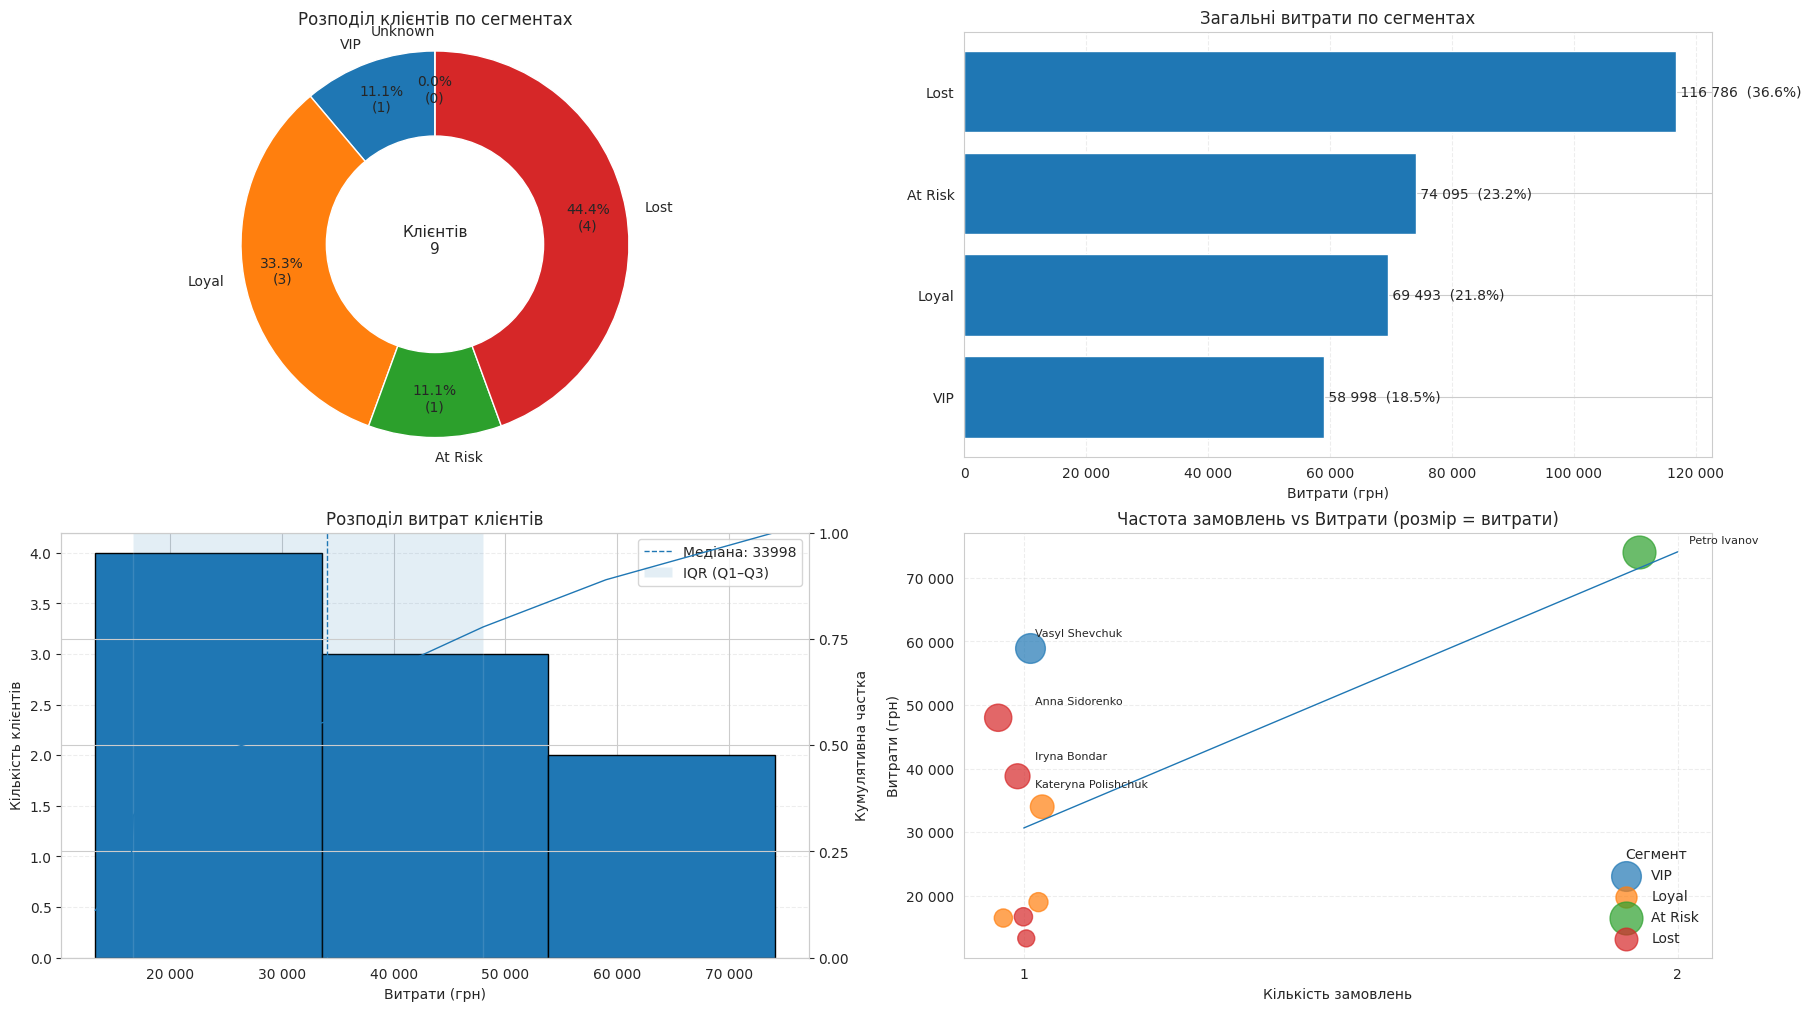


✅ Візуалізацію покращено


In [64]:
if db_ok and 'df' in locals():
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FuncFormatter, MaxNLocator

    print("=" * 80)
    print("ВІЗУАЛІЗАЦІЯ АНАЛІЗУ (v2)")
    print("=" * 80)

    # ---- Підготовка ----
    segment_order = ['VIP', 'Loyal', 'At Risk', 'Lost', 'Unknown']
    df['segment'] = pd.Categorical(df['segment'], categories=segment_order, ordered=True)

    # формат гривні з пробілом: 123 456
    fmt_uah = FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", " "))

    fig, axes = plt.subplots(2, 2, figsize=(18, 10), constrained_layout=True)

    # 1) Донат: розподіл по сегментах + центр з total
    seg_counts = df['segment'].value_counts().reindex(segment_order).dropna()
    wedges, texts, autotexts = axes[0, 0].pie(
        seg_counts.values,
        labels=seg_counts.index.astype(str),
        autopct=lambda p: f"{p:.1f}%\n({int(round(p/100*seg_counts.sum()))})",
        startangle=90,
        pctdistance=0.8
    )
    centre = plt.Circle((0, 0), 0.56, fc='white')
    axes[0, 0].add_artist(centre)
    axes[0, 0].axis('equal')
    axes[0, 0].set_title('Розподіл клієнтів по сегментах')
    axes[0, 0].text(0, 0.02, f"Клієнтів\n{int(seg_counts.sum())}", ha='center', va='center', fontsize=11)

    # 2) Горизонтальний барчарт: витрати + частка %
    revenue_by_segment = (
        df.groupby('segment', observed=True)['total_spent']
          .sum()
          .reindex(segment_order)
          .dropna()
          .sort_values()
    )
    total_rev = revenue_by_segment.sum()
    axes[0, 1].barh(revenue_by_segment.index.astype(str), revenue_by_segment.values)
    axes[0, 1].xaxis.set_major_formatter(fmt_uah)
    axes[0, 1].grid(axis='x', linestyle='--', alpha=0.35)
    for i, v in enumerate(revenue_by_segment.values):
        share = v / total_rev * 100 if total_rev else 0
        axes[0, 1].text(v, i, f" {int(v):,}".replace(",", " ") + f"  ({share:.1f}%)", va='center')
    axes[0, 1].set_title('Загальні витрати по сегментах')
    axes[0, 1].set_xlabel('Витрати (грн)')

    # 3) Гістограма витрат + квартилі + CDF
    spent = df['total_spent'].dropna()
    if len(spent) > 1:
        bins = np.histogram_bin_edges(spent, bins='fd')
    else:
        bins = 5
    axes[1, 0].hist(spent, bins=bins, edgecolor='black')
    q25, q50, q75 = np.percentile(spent, [25, 50, 75])
    axes[1, 0].axvline(q50, linestyle='--', linewidth=1, label=f"Медіана: {q50:.0f}")
    axes[1, 0].axvspan(q25, q75, alpha=0.12, label='IQR (Q1–Q3)')
    axes[1, 0].xaxis.set_major_formatter(fmt_uah)
    axes[1, 0].grid(axis='y', linestyle='--', alpha=0.35)
    axes[1, 0].set_title('Розподіл витрат клієнтів')
    axes[1, 0].set_xlabel('Витрати (грн)')
    axes[1, 0].set_ylabel('Кількість клієнтів')
    axes[1, 0].legend()

    # CDF (вторинна вісь)
    ax_cdf = axes[1, 0].twinx()
    xs = np.sort(spent.values)
    ys = np.arange(1, len(xs) + 1) / len(xs)
    ax_cdf.plot(xs, ys, linewidth=1)
    ax_cdf.set_ylim(0, 1)
    ax_cdf.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax_cdf.set_ylabel('Кумулятивна частка')

    # 4) Скатер (бабл-чарт) з тренд-лінією та легким джитером
    ax = axes[1, 1]
    rng = np.random.default_rng(42)
    for seg, g in df.groupby('segment', observed=True):
        if g.empty:
            continue
        jitter_x = g['total_orders'] + rng.normal(0, 0.03, len(g))  # щоб точки з однаковим x не перекривались
        size = ((g['total_spent'] / max(df['total_spent'].max(), 1)) * 500) + 60
        ax.scatter(jitter_x, g['total_spent'], s=size, alpha=0.7, label=str(seg))

    # тренд по всій вибірці (звичайна лінійна регресія)
    if df['total_orders'].nunique() > 1:
        x = df['total_orders'].values.astype(float)
        y = df['total_spent'].values.astype(float)
        k, b = np.polyfit(x, y, 1)
        xr = np.linspace(x.min(), x.max(), 100)
        ax.plot(xr, k * xr + b, linewidth=1)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(fmt_uah)
    ax.grid(True, linestyle='--', alpha=0.35)
    ax.set_title('Частота замовлень vs Витрати (розмір = витрати)')
    ax.set_xlabel('Кількість замовлень')
    ax.set_ylabel('Витрати (грн)')
    leg = ax.legend(title='Сегмент', frameon=False, loc='lower right')
    for txt in leg.get_texts():
        txt.set_ha('right')

    # Підписуємо топ-5 клієнтів за витратами (акуратні зсуви)
    topN = df.nlargest(5, 'total_spent')
    for i, (_, r) in enumerate(topN.iterrows()):
        ax.annotate(
            r['customer_name'],
            (r['total_orders'], r['total_spent']),
            xytext=(8, 6 + i*2),
            textcoords='offset points',
            fontsize=8
        )

    plt.show()
    print("\n✅ Візуалізацію покращено")



 ### 📊 Висновки з Аналізу Даних



 **Що ми навчилися:**

 - ✅ Інтегрувати pandas з PostgreSQL

 - ✅ Виконувати RFM аналіз для сегментації клієнтів

 - ✅ Створювати візуалізації з matplotlib/seaborn

 - ✅ Інтерпретувати результати аналізу



 **RFM Сегменти:**

 - **VIP** - найкращі клієнти (R↑ F↑ M↑)

 - **Loyal** - лояльні клієнти (F↑)

 - **Promising** - перспективні (R↑)

 - **At Risk** - ризик втрати (R↓ F↑)

 - **Lost** - втрачені клієнти (R↓)

 ---

 # Частина 2: Advanced Модулі

 ---



 Наступна частина призначена для **Senior Data Scientists/Engineers** та покриває:

 - Production ETL pipelines

 - Architectural patterns (Repository, DI, Factory)

 - ML infrastructure (Feature Store)

 - Advanced SQL analytics

 ## 5️⃣ Production ETL Pipeline



 ### 🎯 Навчальні цілі:

 - Створювати async ETL pipelines

 - Використовувати type safety з @dataclass

 - Валідувати дані

 - Збирати метрики

 - Обробляти помилки gracefully

 ### 5.1 Архітектура ETL Pipeline



 **ETL** = Extract → Transform → Load



 Наш pipeline буде:

 - **Extract** - асинхронно витягувати дані з APIs

 - **Transform** - валідувати та трансформувати

 - **Load** - батчами завантажувати в PostgreSQL

 - **Monitor** - збирати метрики продуктивності

In [65]:
# Імпортуємо компоненти з advanced_examples/etl/01_async_etl_pipeline.py
from dataclasses import dataclass, field
from typing import List, Dict, Optional
from collections import defaultdict

@dataclass
class WeatherData:
    """Модель даних погоди з валідацією"""
    city: str
    temperature: float
    humidity: int
    description: str
    timestamp: datetime = field(default_factory=datetime.now)

    def validate(self) -> bool:
        """Валідація даних"""
        if not (-50 <= self.temperature <= 60):
            return False
        if not (0 <= self.humidity <= 100):
            return False
        if not self.city or not self.description:
            return False
        return True

class MetricsCollector:
    """Збір метрик продуктивності"""
    def __init__(self):
        self.metrics: Dict[str, int] = defaultdict(int)
        self.start_time = time.time()

    def increment(self, metric: str, value: int = 1):
        self.metrics[metric] += value

    def get_summary(self) -> Dict[str, Any]:
        elapsed = time.time() - self.start_time
        return {
            'elapsed_seconds': round(elapsed, 2),
            'metrics': dict(self.metrics),
            'throughput': round(self.metrics.get('records_processed', 0) / elapsed, 2) if elapsed > 0 else 0
        }

print("=" * 80)
print("ETL PIPELINE COMPONENTS")
print("=" * 80)
print("✅ WeatherData model - type-safe data structure")
print("✅ MetricsCollector - performance monitoring")
print("\n💡 В production також додайте:")
print("   - Retry logic з exponential backoff")
print("   - Circuit breaker для API calls")
print("   - Dead letter queue для failed records")
print("   - Prometheus metrics export")


ETL PIPELINE COMPONENTS
✅ WeatherData model - type-safe data structure
✅ MetricsCollector - performance monitoring

💡 В production також додайте:
   - Retry logic з exponential backoff
   - Circuit breaker для API calls
   - Dead letter queue для failed records
   - Prometheus metrics export


 ### 5.2 Async Extraction



 Асинхронне витягування даних з множинних джерел паралельно.

In [66]:
async def extract_weather_data(city: str, metrics: MetricsCollector) -> Optional[WeatherData]:
    """Симуляція витягування даних про погоду"""
    try:
        # Симуляція API call
        await asyncio.sleep(0.1)  # В реальності: await session.get(api_url)

        # Симуляція отриманих даних
        import random
        data = WeatherData(
            city=city,
            temperature=round(random.uniform(-10, 35), 1),
            humidity=random.randint(30, 90),
            description=random.choice(['Clear', 'Cloudy', 'Rainy', 'Sunny'])
        )

        metrics.increment('records_extracted')
        return data

    except Exception as e:
        metrics.increment('extraction_errors')
        print(f"❌ Error extracting data for {city}: {e}")
        return None

async def extract_all_weather(cities: List[str]) -> List[WeatherData]:
    """Паралельне витягування даних для всіх міст"""
    metrics = MetricsCollector()

    print("=" * 80)
    print("EXTRACTION PHASE")
    print("=" * 80)
    print(f"🌍 Extracting weather data for {len(cities)} cities...\n")

    # Паралельне виконання
    tasks = [extract_weather_data(city, metrics) for city in cities]
    results = await asyncio.gather(*tasks)

    # Фільтруємо None значення
    valid_results = [r for r in results if r is not None]

    summary = metrics.get_summary()
    print(f"\n✅ Extraction complete:")
    print(f"   Records extracted: {summary['metrics']['records_extracted']}")
    print(f"   Errors: {summary['metrics'].get('extraction_errors', 0)}")
    print(f"   Duration: {summary['elapsed_seconds']}s")
    print(f"   Throughput: {summary['throughput']} records/sec")

    return valid_results

# Тест
cities = ['Kyiv', 'Lviv', 'Odesa', 'Kharkiv', 'Dnipro']
weather_data = await extract_all_weather(cities)

print(f"\n📊 Sample extracted data:")
for data in weather_data[:3]:
    print(f"   {data.city}: {data.temperature}°C, {data.humidity}% humidity, {data.description}")


EXTRACTION PHASE
🌍 Extracting weather data for 5 cities...


✅ Extraction complete:
   Records extracted: 5
   Errors: 0
   Duration: 0.1s
   Throughput: 0.0 records/sec

📊 Sample extracted data:
   Kyiv: 2.3°C, 76% humidity, Cloudy
   Lviv: 16.0°C, 52% humidity, Sunny
   Odesa: 26.6°C, 47% humidity, Sunny


 ### 5.3 Transformation & Validation

In [67]:
def transform_weather_data(raw_data: List[WeatherData]) -> tuple[List[WeatherData], List[WeatherData]]:
    """Трансформація та валідація даних"""
    print("=" * 80)
    print("TRANSFORMATION PHASE")
    print("=" * 80)

    valid_records = []
    invalid_records = []

    for record in raw_data:
        if record.validate():
            # Додаткові трансформації
            # Наприклад, конвертація одиниць, стандардизація форматів
            valid_records.append(record)
        else:
            invalid_records.append(record)

    print(f"✅ Valid records: {len(valid_records)}")
    print(f"❌ Invalid records: {len(invalid_records)}")

    if invalid_records:
        print("\n⚠️ Invalid records:")
        for rec in invalid_records:
            print(f"   {rec}")

    return valid_records, invalid_records

valid_data, invalid_data = transform_weather_data(weather_data)


TRANSFORMATION PHASE
✅ Valid records: 5
❌ Invalid records: 0


 ### 5.4 Batch Loading



 Завантаження даних батчами для оптимальної продуктивності.

In [68]:
if db_ok:
    def load_weather_data_batch(data: List[WeatherData], batch_size: int = 100):
        """Батчеве завантаження з UPSERT"""
        print("=" * 80)
        print("LOADING PHASE")
        print("=" * 80)

        with get_db_connection() as conn:
            cursor = conn.cursor()

            # Створюємо тимчасову таблицю якщо не існує
            cursor.execute("""
                CREATE TABLE IF NOT EXISTS weather_data (
                    id SERIAL PRIMARY KEY,
                    city VARCHAR(100),
                    temperature DECIMAL(5,2),
                    humidity INTEGER,
                    description VARCHAR(200),
                    timestamp TIMESTAMP,
                    UNIQUE(city, timestamp)
                );
            """)

            # Батчеве завантаження
            total_loaded = 0
            for i in range(0, len(data), batch_size):
                batch = data[i:i + batch_size]

                # UPSERT (INSERT ... ON CONFLICT)
                query = """
                INSERT INTO weather_data (city, temperature, humidity, description, timestamp)
                VALUES (%s, %s, %s, %s, %s)
                ON CONFLICT (city, timestamp) DO UPDATE SET
                    temperature = EXCLUDED.temperature,
                    humidity = EXCLUDED.humidity,
                    description = EXCLUDED.description;
                """

                values = [
                    (r.city, r.temperature, r.humidity, r.description, r.timestamp)
                    for r in batch
                ]

                cursor.executemany(query, values)
                total_loaded += len(batch)
                print(f"📦 Loaded batch {i//batch_size + 1}: {len(batch)} records")

            cursor.close()

        print(f"\n✅ Total records loaded: {total_loaded}")
        return total_loaded

    load_weather_data_batch(valid_data)
else:
    print("⚠️ Skipping load phase (DB not available)")


LOADING PHASE
📦 Loaded batch 1: 5 records

✅ Total records loaded: 5


 ### 📊 Висновки з ETL Pipeline



 **Production Best Practices:**

 - ✅ **Type Safety** - використовуйте @dataclass для моделей даних

 - ✅ **Validation** - валідуйте дані перед завантаженням

 - ✅ **Async** - витягуйте дані паралельно

 - ✅ **Batch Loading** - завантажуйте батчами для performance

 - ✅ **Metrics** - збирайте метрики для моніторингу

 - ✅ **Error Handling** - graceful failures, retry logic

 - ✅ **UPSERT** - використовуйте ON CONFLICT для idempotency



 **Що додати далі:**

 - Circuit Breaker pattern для API calls

 - Dead Letter Queue для failed records

 - Prometheus metrics export

 - Data quality checks (Great Expectations)

 ---

 ## 6️⃣ Architectural Patterns



 ### 🎯 Навчальні цілі:

 - Використовувати Repository Pattern

 - Застосовувати Dependency Injection

 - Імплементувати Factory Pattern

 - Писати testable code

 ### 6.1 Repository Pattern



 **Repository Pattern** - абстракція для доступу до даних.



 **Переваги:**

 - Відділення бізнес логіки від data access

 - Легко тестувати (mock repositories)

 - Можна міняти БД без зміни бізнес логіки

In [69]:
from abc import ABC, abstractmethod
from typing import Generic, TypeVar, List, Optional

T = TypeVar('T')

class IRepository(ABC, Generic[T]):
    """Базовий інтерфейс для всіх repositories"""

    @abstractmethod
    def get_by_id(self, id: int) -> Optional[T]:
        """Отримати запис по ID"""
        pass

    @abstractmethod
    def get_all(self) -> List[T]:
        """Отримати всі записи"""
        pass

    @abstractmethod
    def create(self, entity: T) -> T:
        """Створити новий запис"""
        pass

    @abstractmethod
    def update(self, entity: T) -> bool:
        """Оновити запис"""
        pass

    @abstractmethod
    def delete(self, id: int) -> bool:
        """Видалити запис"""
        pass

@dataclass
class Customer:
    """Domain model для клієнта"""
    customer_id: Optional[int]
    first_name: str
    last_name: str
    email: str
    country: str = "Ukraine"

    @property
    def full_name(self) -> str:
        return f"{self.first_name} {self.last_name}"

class ICustomerRepository(IRepository[Customer]):
    """Специфічний інтерфейс для customer repository"""

    @abstractmethod
    def get_by_email(self, email: str) -> Optional[Customer]:
        pass

    @abstractmethod
    def get_by_country(self, country: str) -> List[Customer]:
        pass

print("=" * 80)
print("REPOSITORY PATTERN")
print("=" * 80)
print("✅ IRepository - generic interface")
print("✅ ICustomerRepository - specific interface")
print("✅ Customer - domain model")
print("\n💡 Тепер можемо створювати різні implementations:")
print("   - PostgresCustomerRepository - реальна БД")
print("   - InMemoryCustomerRepository - для тестів")
print("   - MongoCustomerRepository - якщо змінимо БД")


REPOSITORY PATTERN
✅ IRepository - generic interface
✅ ICustomerRepository - specific interface
✅ Customer - domain model

💡 Тепер можемо створювати різні implementations:
   - PostgresCustomerRepository - реальна БД
   - InMemoryCustomerRepository - для тестів
   - MongoCustomerRepository - якщо змінимо БД


 ### 6.2 Repository Implementation

In [70]:
class PostgresCustomerRepository(ICustomerRepository):
    """PostgreSQL implementation of customer repository"""

    # DRY: спільний мапер
    @staticmethod
    def _row_to_customer(row) -> Customer:
        return Customer(
            customer_id=row['id'],          # <- було row['customer_id']
            first_name=row['first_name'],
            last_name=row['last_name'],
            email=row['email'],
            country=row['country']
        )

    def get_by_id(self, id: int) -> Optional[Customer]:
        if not db_ok:
            return None
        with get_db_connection() as conn:
            cursor = conn.cursor(cursor_factory=RealDictCursor)
            cursor.execute("SELECT * FROM customers WHERE id = %s;", (id,))  # <- id
            row = cursor.fetchone()
            cursor.close()
            return self._row_to_customer(row) if row else None

    def get_all(self) -> List[Customer]:
        if not db_ok:
            return []
        with get_db_connection() as conn:
            cursor = conn.cursor(cursor_factory=RealDictCursor)
            cursor.execute("SELECT * FROM customers LIMIT 10;")
            rows = cursor.fetchall()
            cursor.close()
            return [self._row_to_customer(r) for r in rows]

    def get_by_email(self, email: str) -> Optional[Customer]:
        if not db_ok:
            return None
        with get_db_connection() as conn:
            cursor = conn.cursor(cursor_factory=RealDictCursor)
            cursor.execute("SELECT * FROM customers WHERE email = %s;", (email,))
            row = cursor.fetchone()
            cursor.close()
            return self._row_to_customer(row) if row else None

    def get_by_country(self, country: str) -> List[Customer]:
        if not db_ok:
            return []
        with get_db_connection() as conn:
            cursor = conn.cursor(cursor_factory=RealDictCursor)
            cursor.execute("SELECT * FROM customers WHERE country = %s LIMIT 10;", (country,))
            rows = cursor.fetchall()
            cursor.close()
            return [self._row_to_customer(r) for r in rows]

    def create(self, entity: Customer) -> Customer:
        # Implementation...
        pass

    def update(self, entity: Customer) -> bool:
        # Implementation...
        pass

    def delete(self, id: int) -> bool:
        # Implementation...
        pass


# Тестуємо repository
if db_ok:
    print("=" * 80)
    print("REPOSITORY IN ACTION")
    print("=" * 80)

    repo = PostgresCustomerRepository()

    # Get by ID
    customer = repo.get_by_id(1)
    if customer:
        print(f"✅ Found customer: {customer.full_name} ({customer.email})")

    # Get all
    customers = repo.get_all()
    print(f"✅ Retrieved {len(customers)} customers")

    # Get by country
    ukraine_customers = repo.get_by_country("Ukraine")
    print(f"✅ Found {len(ukraine_customers)} customers from Ukraine")


REPOSITORY IN ACTION
✅ Found customer: Petro Ivanov (petro.ivanov@gmail.com)
✅ Retrieved 10 customers
✅ Found 10 customers from Ukraine


 ### 6.3 Dependency Injection & Service Layer

In [71]:
class CustomerService:
    """Business logic layer з dependency injection"""

    def __init__(self, repository: ICustomerRepository):
        """DI: отримуємо repository через конструктор"""
        self.repository = repository

    def get_customer_summary(self, customer_id: int) -> Optional[Dict[str, Any]]:
        """Бізнес логіка: отримати summary клієнта"""
        customer = self.repository.get_by_id(customer_id)

        if not customer:
            return None

        return {
            'id': customer.customer_id,
            'name': customer.full_name,
            'email': customer.email,
            'country': customer.country,
            'risk_score': self._calculate_risk_score(customer)
        }

    def _calculate_risk_score(self, customer: Customer) -> float:
        """Приклад бізнес логіки"""
        # В реальності тут була б складна логіка
        return 0.0

print("=" * 80)
print("DEPENDENCY INJECTION")
print("=" * 80)
print("✅ CustomerService отримує repository через конструктор")
print("✅ Можемо передати будь-яку implementation (Postgres, InMemory, Mock)")
print("✅ Service не знає про деталі БД - тільки про бізнес логіку")

if db_ok:
    # Використання з DI
    repo = PostgresCustomerRepository()
    service = CustomerService(repository=repo)

    summary = service.get_customer_summary(1)
    if summary:
        print(f"\n📊 Customer Summary:")
        for key, value in summary.items():
            print(f"   {key}: {value}")


DEPENDENCY INJECTION
✅ CustomerService отримує repository через конструктор
✅ Можемо передати будь-яку implementation (Postgres, InMemory, Mock)
✅ Service не знає про деталі БД - тільки про бізнес логіку

📊 Customer Summary:
   id: 1
   name: Petro Ivanov
   email: petro.ivanov@gmail.com
   country: Ukraine
   risk_score: 0.0


 ### 6.4 Factory Pattern

In [72]:
class RepositoryFactory:
    """Factory для створення repositories"""

    @staticmethod
    def create_customer_repository(env: str = 'production') -> ICustomerRepository:
        """Створює відповідний repository в залежності від environment"""

        if env == 'production':
            return PostgresCustomerRepository()
        elif env == 'test':
            # Повертаємо mock для тестів
            return InMemoryCustomerRepository()
        else:
            raise ValueError(f"Unknown environment: {env}")

class InMemoryCustomerRepository(ICustomerRepository):
    """In-memory implementation для тестів"""

    def __init__(self):
        self.customers: Dict[int, Customer] = {
            1: Customer(1, "Test", "User", "test@example.com"),
            2: Customer(2, "Mock", "Customer", "mock@example.com"),
        }

    def get_by_id(self, id: int) -> Optional[Customer]:
        return self.customers.get(id)

    def get_all(self) -> List[Customer]:
        return list(self.customers.values())

    def get_by_email(self, email: str) -> Optional[Customer]:
        for customer in self.customers.values():
            if customer.email == email:
                return customer
        return None

    def get_by_country(self, country: str) -> List[Customer]:
        return [c for c in self.customers.values() if c.country == country]

    def create(self, entity: Customer) -> Customer:
        new_id = max(self.customers.keys()) + 1
        entity.customer_id = new_id
        self.customers[new_id] = entity
        return entity

    def update(self, entity: Customer) -> bool:
        if entity.customer_id in self.customers:
            self.customers[entity.customer_id] = entity
            return True
        return False

    def delete(self, id: int) -> bool:
        if id in self.customers:
            del self.customers[id]
            return True
        return False

print("=" * 80)
print("FACTORY PATTERN")
print("=" * 80)

# Production
prod_repo = RepositoryFactory.create_customer_repository('production')
print(f"✅ Production repo: {type(prod_repo).__name__}")

# Test
test_repo = RepositoryFactory.create_customer_repository('test')
print(f"✅ Test repo: {type(test_repo).__name__}")

# Використання test repository
test_service = CustomerService(repository=test_repo)
test_summary = test_service.get_customer_summary(1)
print(f"\n📊 Test Summary: {test_summary}")


FACTORY PATTERN
✅ Production repo: PostgresCustomerRepository
✅ Test repo: InMemoryCustomerRepository

📊 Test Summary: {'id': 1, 'name': 'Test User', 'email': 'test@example.com', 'country': 'Ukraine', 'risk_score': 0.0}


 ### 📊 Висновки з Architectural Patterns



 **Patterns які розглянули:**

 - ✅ **Repository Pattern** - абстракція data access

 - ✅ **Dependency Injection** - loose coupling

 - ✅ **Factory Pattern** - flexible object creation

 - ✅ **Service Layer** - business logic separation



 **Переваги:**

 - ✅ Testable code (легко писати unit tests)

 - ✅ Maintainable (легко міняти implementation)

 - ✅ SOLID principles

 - ✅ Clean Architecture



 **Коли використовувати:**

 - ✅ Production applications

 - ✅ Середні та великі проєкти

 - ✅ Командна розробка

 - ❌ НЕ для простих скриптів (over-engineering)

 ---

 ## 7️⃣ ML Feature Store



 ### 🎯 Навчальні цілі:

 - Створювати Feature Store для ML

 - Виконувати feature engineering

 - Розділяти offline/online stores

 - Підтримувати point-in-time correctness

 ### 7.1 Feature Store Architecture



 **Feature Store** - централізоване сховище для ML features:

 - **Offline Store** - historical features для training

 - **Online Store** - real-time features для inference

 - **Feature Registry** - metadata про features

In [73]:
class FeatureStore:
    """Simplified Feature Store implementation"""

    def __init__(self, db_connection_params: Dict[str, str]):
        self.db_params = db_connection_params

    def compute_customer_features(self) -> pd.DataFrame:
        """Обчислення features для клієнтів"""
        if not db_ok:
            print("⚠️ DB not available")
            return pd.DataFrame()

        print("=" * 80)
        print("FEATURE ENGINEERING")
        print("=" * 80)

        query = """
        WITH customer_orders AS (
            SELECT
                c.id AS customer_id,
                COUNT(DISTINCT o.id) AS total_orders,
                SUM(oi.quantity * oi.price_at_purchase) AS total_spent,
                MAX(o.order_date) AS last_order_date,
                MIN(o.order_date) AS first_order_date,
                COUNT(DISTINCT DATE_TRUNC('month', o.order_date)) AS active_months
            FROM customers c
            LEFT JOIN orders o       ON o.customer_id = c.id
            LEFT JOIN order_items oi ON oi.order_id   = o.id
            GROUP BY c.id
        )
        SELECT
            customer_id,
            COALESCE(total_orders, 0) AS total_orders,
            COALESCE(total_spent, 0) AS total_spent,
            -- середній чек: total_spent / кількість замовлень
            COALESCE(total_spent, 0) / NULLIF(total_orders, 0) AS avg_order_value,
            EXTRACT(EPOCH FROM (CURRENT_DATE - last_order_date)) / 86400  AS recency_days,
            EXTRACT(EPOCH FROM (last_order_date - first_order_date)) / 86400 AS customer_lifetime_days,
            COALESCE(active_months, 0) AS active_months,
            -- RFM: свіжіші дати мають БІЛЬШИЙ бал (5=краще)
            (6 - NTILE(5) OVER (ORDER BY last_order_date DESC)) AS recency_score,
            NTILE(5) OVER (ORDER BY total_orders)               AS frequency_score,
            NTILE(5) OVER (ORDER BY total_spent)                AS monetary_score
        FROM customer_orders
        WHERE total_orders > 0;
        """

        conn = psycopg2.connect(**self.db_params)
        df = pd.read_sql_query(query, conn)
        conn.close()

        # Додаткові computed features
        df['avg_orders_per_month'] = df['total_orders'] / df['active_months'].replace(0, 1)
        df['rfm_score'] = df['recency_score'] + df['frequency_score'] + df['monetary_score']

        # CLV (дуже проста евристика)
        df['predicted_clv'] = df['avg_order_value'] * df['avg_orders_per_month'] * 12

        # Проста метрика ризику відтоку
        df['churn_risk'] = (
            (df['recency_days'] > 90).astype(int) * 0.5 +
            (df['total_orders'] < 3).astype(int) * 0.3 +
            (df['avg_order_value'] < df['avg_order_value'].median()).astype(int) * 0.2
        )

        print(f"✅ Computed features for {len(df)} customers")
        print(f"✅ Total features: {len(df.columns)}")

        return df

    def save_features(self, entity_type: str, features_df: pd.DataFrame):
        """Зберігає features в offline store"""
        if not db_ok:
            print("⚠️ DB not available")
            return

        print("=" * 80)
        print("SAVING TO OFFLINE STORE")
        print("=" * 80)

        table_name = f"features_{entity_type}"

        with get_db_connection() as conn:
            cursor = conn.cursor()

            cursor.execute(f"""
                CREATE TABLE IF NOT EXISTS {table_name} (
                    customer_id INTEGER PRIMARY KEY,
                    total_orders INTEGER,
                    total_spent DECIMAL(12,2),
                    avg_order_value DECIMAL(12,2),
                    recency_days DECIMAL(12,2),
                    customer_lifetime_days DECIMAL(12,2),
                    active_months INTEGER,
                    recency_score INTEGER,
                    frequency_score INTEGER,
                    monetary_score INTEGER,
                    avg_orders_per_month DECIMAL(12,2),
                    rfm_score INTEGER,
                    predicted_clv DECIMAL(12,2),
                    churn_risk DECIMAL(6,4),
                    computed_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
                );
            """)

            for _, row in features_df.iterrows():
                cursor.execute(f"""
                    INSERT INTO {table_name}
                    (customer_id, total_orders, total_spent, avg_order_value,
                     recency_days, customer_lifetime_days, active_months,
                     recency_score, frequency_score, monetary_score,
                     avg_orders_per_month, rfm_score, predicted_clv, churn_risk)
                    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
                    ON CONFLICT (customer_id) DO UPDATE SET
                        total_orders = EXCLUDED.total_orders,
                        total_spent = EXCLUDED.total_spent,
                        avg_order_value = EXCLUDED.avg_order_value,
                        recency_days = EXCLUDED.recency_days,
                        customer_lifetime_days = EXCLUDED.customer_lifetime_days,
                        active_months = EXCLUDED.active_months,
                        recency_score = EXCLUDED.recency_score,
                        frequency_score = EXCLUDED.frequency_score,
                        monetary_score = EXCLUDED.monetary_score,
                        avg_orders_per_month = EXCLUDED.avg_orders_per_month,
                        rfm_score = EXCLUDED.rfm_score,
                        predicted_clv = EXCLUDED.predicted_clv,
                        churn_risk = EXCLUDED.churn_risk,
                        computed_at = CURRENT_TIMESTAMP;
                """, (
                    int(row['customer_id']), int(row['total_orders']), float(row['total_spent']),
                    float(row['avg_order_value']), float(row['recency_days']),
                    float(row['customer_lifetime_days']), int(row['active_months']),
                    int(row['recency_score']), int(row['frequency_score']), int(row['monetary_score']),
                    float(row['avg_orders_per_month']), int(row['rfm_score']),
                    float(row['predicted_clv']), float(row['churn_risk'])
                ))

            cursor.close()

        print(f"✅ Saved {len(features_df)} feature vectors to {table_name}")

    def get_features(self, entity_type: str, entity_ids: List[int]) -> pd.DataFrame:
        """Отримує features для inference (online store)"""
        if not db_ok:
            return pd.DataFrame()

        table_name = f"features_{entity_type}"
        conn = psycopg2.connect(**self.db_params)

        placeholders = ','.join(['%s'] * len(entity_ids))
        query = f"SELECT * FROM {table_name} WHERE customer_id IN ({placeholders});"

        df = pd.read_sql_query(query, conn, params=entity_ids)
        conn.close()
        return df


 ### 7.2 ML Model Integration

In [74]:
if db_ok and 'features_df' in locals():
    print("=" * 80)
    print("ML MODEL INTEGRATION")
    print("=" * 80)

    # Підготовка даних для ML
    feature_columns = [
        'total_orders', 'total_spent', 'avg_order_value',
        'recency_days', 'customer_lifetime_days', 'active_months',
        'recency_score', 'frequency_score', 'monetary_score'
    ]

    X = features_df[feature_columns].fillna(0)
    y = (features_df['churn_risk'] > 0.5).astype(int)

    print(f"✅ Features shape: {X.shape}")
    print(f"✅ Target distribution:")
    print(f"   No churn: {(y==0).sum()}")
    print(f"   Churn: {(y==1).sum()}")

    print("\n💡 Наступні кроки:")
    print("   1. Train/test split")
    print("   2. Model training (XGBoost, LightGBM)")
    print("   3. Model evaluation")
    print("   4. Feature importance analysis")
    print("   5. Model deployment")
    print("   6. Online inference через Feature Store")


 ### 📊 Висновки з Feature Store



 **Що ми навчилися:**

 - ✅ Створювати централізоване сховище для features

 - ✅ Feature engineering з SQL та pandas

 - ✅ Offline store для training

 - ✅ Online store для inference

 - ✅ RFM, CLV, Churn risk computation



 **Production Best Practices:**

 - ✅ **Point-in-time correctness** - features з правильного моменту часу

 - ✅ **Feature versioning** - track changes

 - ✅ **Monitoring** - data drift detection

 - ✅ **Documentation** - feature definitions

 - ✅ **Access control** - хто може читати/писати



 **Tools для Production:**

 - Feast - open-source feature store

 - Tecton - managed feature platform

 - AWS SageMaker Feature Store

 - Databricks Feature Store

 ---

 ## 8️⃣ Advanced SQL Analytics



 ### 🎯 Навчальні цілі:

 - Cohort analysis для retention

 - Funnel analysis для conversion

 - Time-series analysis

 - Statistical functions

 ### 8.1 Cohort Analysis

In [76]:
if db_ok:
    print("=" * 80)
    print("COHORT ANALYSIS - Retention by Registration Month")
    print("=" * 80)

    cohort_query = """
    WITH base AS (
        SELECT
            c.id AS customer_id,
            DATE_TRUNC('month', c.registration_date)::date AS cohort_month,
            o.id AS order_id,
            o.order_date,
            DATE_TRUNC('month', o.order_date)::date AS order_month
        FROM customers c
        LEFT JOIN orders o ON o.customer_id = c.id
    ),
    cohort_sizes AS (
        SELECT
            cohort_month,
            COUNT(DISTINCT customer_id) AS cohort_size
        FROM base
        GROUP BY cohort_month
    ),
    cohort_activity AS (
        SELECT
            cohort_month,
            order_month,
            COUNT(DISTINCT customer_id) AS active_customers,
            (
              (EXTRACT(YEAR  FROM order_month) * 12 + EXTRACT(MONTH FROM order_month)) -
              (EXTRACT(YEAR  FROM cohort_month) * 12 + EXTRACT(MONTH FROM cohort_month))
            )::int AS months_since_registration
        FROM base
        WHERE order_month IS NOT NULL
        GROUP BY cohort_month, order_month
    )
    SELECT
        ca.cohort_month,
        cs.cohort_size,
        ca.months_since_registration,
        ca.active_customers,
        ROUND(100.0 * ca.active_customers / NULLIF(cs.cohort_size, 0), 2) AS retention_rate
    FROM cohort_activity ca
    JOIN cohort_sizes cs USING (cohort_month)
    WHERE ca.months_since_registration BETWEEN 0 AND 6
    ORDER BY ca.cohort_month, ca.months_since_registration
    LIMIT 20;
    """

    conn = psycopg2.connect(
        host="localhost",
        database="learning_db",
        user="admin",
        password="admin123"
    )
    cohort_df = pd.read_sql_query(cohort_query, conn)
    conn.close()

    print(f"\n{'Cohort':12} | {'Size':>6} | {'Month':>6} | {'Active':>8} | {'Retention':>10}")
    print("-" * 80)
    for _, row in cohort_df.head(15).iterrows():
        print(f"{str(row['cohort_month'])[:10]:12} | "
              f"{int(row['cohort_size']):6d} | "
              f"{int(row['months_since_registration']):6d} | "
              f"{int(row['active_customers']):8d} | "
              f"{row['retention_rate']:9.1f}%")


COHORT ANALYSIS - Retention by Registration Month

Cohort       |   Size |  Month |   Active |  Retention
--------------------------------------------------------------------------------


 ### 8.2 Funnel Analysis

In [79]:
if db_ok:
    print("=" * 80)
    print("FUNNEL ANALYSIS - Purchase Conversion")
    print("=" * 80)

    funnel_query = """
    WITH base AS (
        SELECT
            c.id AS customer_id,
            o.id AS order_id,
            oi.order_id AS has_item
        FROM customers c
        LEFT JOIN orders o       ON o.customer_id = c.id
        LEFT JOIN order_items oi ON oi.order_id   = o.id
    ),
    order_counts AS (
        SELECT customer_id, COUNT(*) AS orders
        FROM orders
        GROUP BY customer_id
    ),
    funnel AS (
        SELECT
            COUNT(DISTINCT b.customer_id)                                         AS registered_users,
            COUNT(DISTINCT CASE WHEN b.order_id  IS NOT NULL THEN b.customer_id END) AS users_with_orders,
            COUNT(DISTINCT CASE WHEN b.has_item IS NOT NULL THEN b.customer_id END)  AS users_with_items,
            COUNT(DISTINCT CASE WHEN oc.orders >= 2 THEN oc.customer_id END)         AS repeat_customers
        FROM base b
        LEFT JOIN order_counts oc ON oc.customer_id = b.customer_id
    )
    SELECT
        registered_users,
        users_with_orders,
        users_with_items,
        repeat_customers,
        ROUND(100.0 * users_with_orders / NULLIF(registered_users, 0), 2) AS conversion_to_order,
        ROUND(100.0 * users_with_items / NULLIF(users_with_orders, 0), 2) AS conversion_to_items,
        ROUND(100.0 * repeat_customers / NULLIF(users_with_orders, 0), 2) AS conversion_to_repeat
    FROM funnel;
    """


    conn = psycopg2.connect(
        host="localhost",
        database="learning_db",
        user="admin",
        password="admin123"
    )

    funnel_df = pd.read_sql_query(funnel_query, conn)
    conn.close()

    if len(funnel_df) > 0:
        row = funnel_df.iloc[0]
        print(f"\n📊 Conversion Funnel:")
        print(f"   1. Registered Users:    {row['registered_users']:6} (100.0%)")
        print(f"   2. Users with Orders:   {row['users_with_orders']:6} ({row['conversion_to_order']:5.1f}%)")
        print(f"   3. Users with Items:    {row['users_with_items']:6} ({row['conversion_to_items']:5.1f}%)")
        print(f"   4. Repeat Customers:    {row['repeat_customers']:6} ({row['conversion_to_repeat']:5.1f}%)")


FUNNEL ANALYSIS - Purchase Conversion

📊 Conversion Funnel:
   1. Registered Users:      10.0 (100.0%)
   2. Users with Orders:      9.0 ( 90.0%)
   3. Users with Items:       9.0 (100.0%)
   4. Repeat Customers:       1.0 ( 11.1%)


 ### 8.3 Time-Series Analysis

In [81]:
timeseries_query_0 = """
WITH daily_sales AS (
    SELECT
        DATE_TRUNC('day', o.order_date)::date AS sale_date,
        SUM(oi.quantity * oi.price_at_purchase) AS daily_revenue,
        COUNT(DISTINCT o.id) AS daily_orders
    FROM orders o
    JOIN order_items oi ON oi.order_id = o.id
    GROUP BY DATE_TRUNC('day', o.order_date)
)
SELECT
    sale_date,
    daily_revenue,
    daily_orders,
    AVG(daily_revenue) OVER (
        ORDER BY sale_date
        ROWS BETWEEN 6 PRECEDING AND CURRENT ROW
    ) AS revenue_7day_ma,
    AVG(daily_revenue) OVER (
        ORDER BY sale_date
        ROWS BETWEEN 29 PRECEDING AND CURRENT ROW
    ) AS revenue_30day_ma
FROM daily_sales
ORDER BY sale_date DESC
LIMIT 15;
"""


In [82]:
if db_ok:
    print("=" * 80)
    print("TIME-SERIES ANALYSIS - Moving Averages")
    print("=" * 80)

    timeseries_query = """
    WITH daily_sales AS (
        SELECT
            DATE_TRUNC('day', o.order_date)::date AS sale_date,
            SUM(oi.quantity * oi.price_at_purchase) AS daily_revenue,
            COUNT(DISTINCT o.id) AS daily_orders
        FROM orders o
        JOIN order_items oi ON oi.order_id = o.id
        GROUP BY DATE_TRUNC('day', o.order_date)
    ),
    series AS (
        SELECT generate_series(min(sale_date), max(sale_date), interval '1 day')::date AS sale_date
        FROM daily_sales
    ),
    filled AS (
        SELECT s.sale_date,
            COALESCE(ds.daily_revenue, 0) AS daily_revenue,
            COALESCE(ds.daily_orders, 0) AS daily_orders
        FROM series s
        LEFT JOIN daily_sales ds USING (sale_date)
    )
    SELECT
        sale_date,
        daily_revenue,
        daily_orders,
        AVG(daily_revenue) OVER (ORDER BY sale_date ROWS BETWEEN 6 PRECEDING AND CURRENT ROW)  AS revenue_7day_ma,
        AVG(daily_revenue) OVER (ORDER BY sale_date ROWS BETWEEN 29 PRECEDING AND CURRENT ROW) AS revenue_30day_ma
    FROM filled
    ORDER BY sale_date DESC
    LIMIT 15;
    """


    conn = psycopg2.connect(
        host="localhost",
        database="learning_db",
        user="admin",
        password="admin123"
    )

    ts_df = pd.read_sql_query(timeseries_query, conn)
    conn.close()

    print(f"\n{'Date':12} | {'Revenue':>10} | {'Orders':>7} | {'7-day MA':>10} | {'30-day MA':>10}")
    print("-" * 80)
    for _, row in ts_df.iterrows():
        print(f"{str(row['sale_date'])[:10]:12} | {row['daily_revenue']:10.2f} | {row['daily_orders']:7} | {row['revenue_7day_ma']:10.2f} | {row['revenue_30day_ma']:10.2f}")


TIME-SERIES ANALYSIS - Moving Averages

Date         |    Revenue |  Orders |   7-day MA |  30-day MA
--------------------------------------------------------------------------------
2024-10-15   |   58998.00 |       1 |   18355.86 |   21291.47
2024-10-14   |   33998.00 |       1 |   12312.57 |   18598.14
2024-10-13   |       0.00 |       0 |   14455.43 |   17413.54
2024-10-12   |   18997.00 |       1 |   14455.43 |   18864.67
2024-10-11   |       0.00 |       0 |   17284.14 |   18852.64
2024-10-10   |   16498.00 |       1 |   17284.14 |   20737.90
2024-10-09   |       0.00 |       0 |   16826.71 |   21209.00
2024-10-08   |   16695.00 |       1 |   23683.43 |   23860.12
2024-10-07   |   48998.00 |       1 |   24883.71 |   24883.71
2024-10-06   |       0.00 |       0 |   20864.67 |   20864.67
2024-10-05   |   38798.00 |       1 |   25037.60 |   25037.60
2024-10-04   |       0.00 |       0 |   21597.50 |   21597.50
2024-10-03   |   13296.00 |       1 |   28796.67 |   28796.67
2024-10-02 

 ### 📊 Висновки з Advanced SQL



 **Що ми навчилися:**

 - ✅ **Cohort Analysis** - retention metrics

 - ✅ **Funnel Analysis** - conversion optimization

 - ✅ **Time-Series** - moving averages, trends

 - ✅ **Window Functions** - LAG, LEAD, NTILE

 - ✅ **CTEs** - складні запити з підзапитами



 **Інші Advanced техніки (в sql_examples/05_advanced_analytics.sql):**

 - Market Basket Analysis (product affinity)

 - Statistical Functions (percentiles, correlation)

 - Outlier Detection

 - ML Feature Engineering SQL



 **Production Tips:**

 - Використовуйте materialized views для складних аналітик

 - Індексуйте колонки для дат та JOIN ключів

 - Партиціонуйте великі таблиці по датах

 - Кешуйте результати в Redis для real-time dashboards

 ---

 # 🎉 Вітаємо! Ви завершили повний tutorial

 ---



 ## 📚 Що ви вивчили:



 ### Базові Модулі:

 - ✅ Асинхронне програмування з asyncio та aiohttp

 - ✅ SQL основи: SELECT, JOIN, GROUP BY, Window Functions

 - ✅ Python + PostgreSQL з psycopg2

 - ✅ Аналіз даних з pandas та візуалізація



 ### Advanced Модулі:

 - ✅ Production ETL Pipeline з metrics та validation

 - ✅ Architectural Patterns: Repository, DI, Factory

 - ✅ ML Feature Store для feature engineering

 - ✅ Advanced SQL Analytics: cohort, funnel, time-series



 ## 🚀 Наступні кроки:



 1. **Практика** - Модифікуйте код для своїх use cases

 2. **Розширення** - Додайте власні features

 3. **Production** - Додайте тести, моніторинг, CI/CD

 4. **Поділіться** - Додайте проєкт в portfolio



 ## 📖 Корисні Ресурси:



 - [Python asyncio docs](https://docs.python.org/3/library/asyncio.html)

 - [PostgreSQL docs](https://www.postgresql.org/docs/)

 - [pandas docs](https://pandas.pydata.org/docs/)

 - [Feast Feature Store](https://feast.dev/)



 ## 💬 Feedback:



 Відкривайте Issues або Pull Requests для покращення матеріалу!



 ---

 **Happy Coding! 🎉**